In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\Finance banking & credit.csv")

In [3]:
df.head()

,Rank,Website,Category,Rank Change,Avg. Visit Duration,Pages / Visit,Bounce Rate
0,1,paypal.com,Finance > Banking Credit and Lending,=,00:03:31,5.26,22.99%
1,2,chase.com,Finance > Banking Credit and Lending,=,00:07:13,10.37,17.36%
2,3,caixa.gov.br,Finance > Banking Credit and Lending,=,00:05:13,4.66,39.14%
3,4,capitalone.com,Finance > Banking Credit and Lending,=,00:05:25,8.10,20.73%
4,5,wellsfargo.com,Finance > Banking Credit and Lending,=,00:05:51,11.70,17.08%


In [10]:
# Check for missing values in the dataset
print(df.isnull().sum())


Rank                   0
Website                0
Category               0
Rank Change            0
Avg. Visit Duration    0
Pages / Visit          0
Bounce Rate            0
Cluster                0
dtype: int64


In [11]:
# Convert 'Rank Change' to numerical values
df['Rank Change'] = pd.to_numeric(df['Rank Change'], errors='coerce')


In [13]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df is your DataFrame with the dataset
features = df[['Avg. Visit Duration', 'Pages / Visit', 'Bounce Rate']]

# Convert 'Avg. Visit Duration' to total seconds
features['Avg. Visit Duration'] = pd.to_timedelta(features['Avg. Visit Duration']).dt.total_seconds()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical features
df[['Avg. Visit Duration', 'Pages / Visit', 'Bounce Rate']] = scaler.fit_transform(features)


C:\Users\ayush\AppData\Local\Temp\ipykernel_35672\2627742742.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Avg. Visit Duration'] = pd.to_timedelta(features['Avg. Visit Duration']).dt.total_seconds()


ValueError: could not convert string to float: '22.99%'

In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming df is your DataFrame with the dataset
features = df[['Avg. Visit Duration', 'Pages / Visit', 'Bounce Rate']]

# Convert 'Avg. Visit Duration' to total seconds
features['Avg. Visit Duration'] = pd.to_timedelta(features['Avg. Visit Duration']).dt.total_seconds()

# Remove '%' from 'Bounce Rate' and convert to float
features['Bounce Rate'] = features['Bounce Rate'].str.rstrip('%').astype('float') / 100.0

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical features
df[['Avg. Visit Duration', 'Pages / Visit', 'Bounce Rate']] = scaler.fit_transform(features)


C:\Users\ayush\AppData\Local\Temp\ipykernel_35672\1446437587.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Avg. Visit Duration'] = pd.to_timedelta(features['Avg. Visit Duration']).dt.total_seconds()
C:\Users\ayush\AppData\Local\Temp\ipykernel_35672\1446437587.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Bounce Rate'] = features['Bounce Rate'].str.rstrip('%').astype('float') / 100.0


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for normalization
numerical_features = df[['Avg. Visit Duration', 'Pages / Visit', 'Bounce Rate']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical features
df[['Avg. Visit Duration', 'Pages / Visit', 'Bounce Rate']] = scaler.fit_transform(numerical_features)


In [16]:
from sklearn.cluster import KMeans

# Assuming df is your DataFrame with the preprocessed data
X = df[['Avg. Visit Duration', 'Pages / Visit', 'Bounce Rate']]

# Choose the number of clusters (you may need to experiment with different values)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


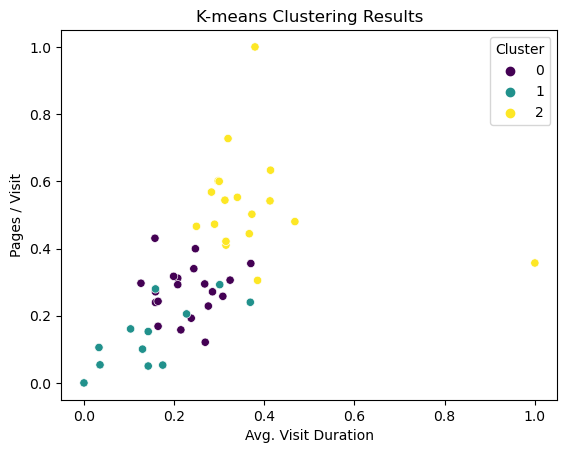

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the clusters
sns.scatterplot(x='Avg. Visit Duration', y='Pages / Visit', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering Results')
plt.show()


In [18]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


              Rank  Rank Change  Avg. Visit Duration  Pages / Visit  \
Cluster                                                               
0        23.500000     2.375000             0.229425       0.274788   
1        30.583333     3.500000             0.151533       0.141230   
2        24.333333     3.545455             0.378863       0.534781   

         Bounce Rate  
Cluster               
0           0.275564  
1           0.628224  
2           0.155557  


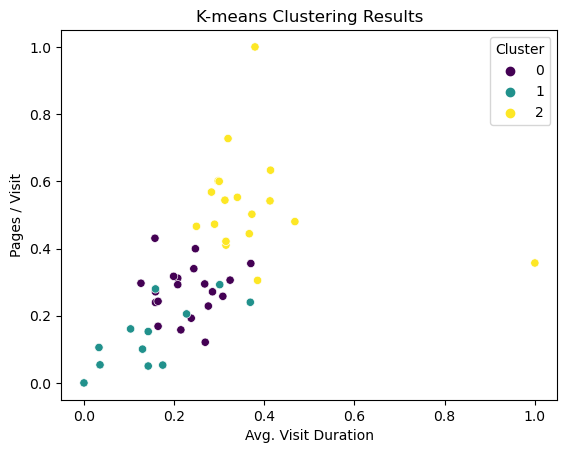

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the clusters
sns.scatterplot(x='Avg. Visit Duration', y='Pages / Visit', hue='Cluster', data=df, palette='viridis')
plt.title('K-means Clustering Results')
plt.show()
